# P2-1 K-临近值算法
1. 计算一直类别数据集中的点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的k个点
4. 确定前k个点所在的类别的出现频率
5. 返回前k个点出现频率最高的类别最为当前点的预测分类

In [1]:
import numpy as np
import operator

def classify0(inX, dataSet, labels, k):
    """
    inX: 需要判断的点
    data_set: 数据集
    labels: 数据集的标签
    k: 选取k个最临近点
    """

    # 距离计算
    dataSetSize = dataSet.shape[0]  # 数据集（维度）大小
    # Numpy的 tile() 函数，就是将原矩阵横向、纵向地复制。tile 是瓷砖的意思，顾名思义，这个函数就是把数组像瓷砖一样铺展开来。
    # inX.shape => (2,), data_set.shape => (4,2), 将inX铺成data_set相同shape的数组
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2 
    sqDistances = sqDiffMat.sum(axis=1)  # axis=1就是将一个矩阵的每一行相加
    distances = sqDistances ** 0.5  # 相当于计算出到每一个点的直线距离，[1.48660687, 1.41421356, 0.        , 0.1       ]
    sortedDistIndicies = distances.argsort()  # argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y， [2, 3, 1, 0]

    # 选择距离最小的k个点
    classCount = {}
    for i in range(k):  # 选距离最近的k个点
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [2]:
group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
labels = ['A', 'A', 'B', 'B']
rst = classify0([0,0.3], group, labels, 3)
print(rst)

B


# P2-2 将文本记录转换为NumPy的解析程序

In [3]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()  # strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [4]:
datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")

## 创建散点图
### 采用矩阵的第二和第三列属性

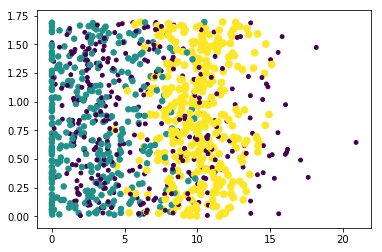

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(datingDataMat[:,1],datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

### 采用矩阵的第一和第二列属性得到更好的展示效果

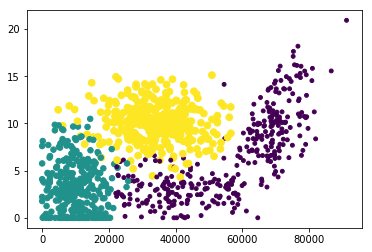

In [8]:
plt.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

# P2-3 归一化特征值
- datingTestSet.txt文件中的数据结构如下
    ```
    每年飞行常客里程,游戏时间占比,每周冰淇淋消耗
            40920	8.326976	0.953952	largeDoses
            14488	7.153469	1.673904	smallDoses
            26052	1.441871	0.805124	didntLike
            ...
    ```
- 最后一列转换 --> datingTestSet2.txt
    - largeDoses --> 3
    - smallDoses --> 2
    - didntLike --> 1
- 归一化
    - 让权重变为统一

In [7]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) # min(0) 矩阵每一列的最小值
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges, (m,1))
    return normDataSet, ranges, minVals

In [8]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)

In [10]:
normDataSet

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

# P2-4 分类器针对约会网站的测试代码

In [11]:
def datingClassTest():
    hoRation = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRation)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(
            normMat[i,:],
            normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m],
            3
        )
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1
    print("the total error rate is %f" % (errorCount/float(numTestVecs)))

In [12]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

# P2-5 约会网站预测函数

In [13]:
def clasifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    # raw_input() 允许用户输入文本行命令并返回用户所输入的命令
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("iters of ice ream consumed per year?"))
    
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")
    normDataSet, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normDataSet, datingLabels, 3)
    print("You will probably like this person:", resultList[classifierResult - 1])

In [14]:
clasifyPerson()

percentage of time spent playing video games?12
frequent flier miles earned per year?10000
iters of ice ream consumed per year?0.5
You will probably like this person: in large doses


In [15]:
clasifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
iters of ice ream consumed per year?0.5
You will probably like this person: in small doses


# 示例: 手写数字识别
- 训练集: "trainingDigits"
- 测试集: "testDigits"

In [ ]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = 